In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import patsy

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

In [182]:
len(df2['country'])

8141

In [167]:
df2 = pd.read_csv('/Users/samanthafalk/class-GA/week-five/1.3-classification-challenge/classification_challenge_submission.csv') # read in the census-derived data; mind the separator
df2.head()

,Unnamed: 0,age,type_employer,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country
0,18099,45,Federal-gov,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,20,United-States
1,10672,17,Private,12th,8,Never-married,Sales,Own-child,White,Male,0,0,40,United-States
2,17947,24,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States
3,13753,46,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,4064,0,40,United-States
4,4279,59,Private,Bachelors,13,Separated,Adm-clerical,Unmarried,White,Male,0,0,60,United-States


In [103]:
df2['type_employer'].unique()

array(['Federal-gov', 'Private', 'Self-emp-not-inc', 'Self-emp-inc',
       'State-gov', 'Local-gov', 'Without-pay'], dtype=object)

In [104]:
wdf['type_employer'].unique()

array(['Private', 'Self-emp-not-inc', 'State-gov', 'Local-gov', nan,
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'], dtype=object)

In [16]:
df2['country'].unique()

array(['United-States', 'Jamaica', 'Mexico', 'Hungary', 'Italy', 'Ecuador',
       'Philippines', 'Trinadad&Tobago', 'Vietnam', 'Guatemala', 'Hong',
       'Cuba', 'Canada', '?', 'Haiti', 'Taiwan', 'Germany', 'China',
       'South', 'Columbia', 'England', 'El-Salvador', 'Thailand', 'Poland',
       'India', 'Puerto-Rico', 'Cambodia', 'Dominican-Republic', 'Japan',
       'Greece', 'Yugoslavia', 'Nicaragua', 'Portugal', 'France', 'Peru',
       'Ireland', 'Honduras', 'Outlying-US(Guam-USVI-etc)', 'Iran', 'Laos',
       'Scotland'], dtype=object)

In [168]:
df = pd.read_csv('/Users/samanthafalk/class-GA/week-five/1.3-classification-challenge/classification_challenge_training.csv') # read in the census-derived data; mind the separator
df.head()

,Unnamed: 0,age,type_employer,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
1,14656,32,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,1
2,26677,29,Private,10th,6,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico,0
3,4281,30,Private,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico,0
4,15668,66,Private,HS-grad,9,Widowed,Priv-house-serv,Not-in-family,White,Female,0,0,8,United-States,0


In [28]:
df['type_employer']

0                 Private
1                 Private
2                 Private
3                 Private
4                 Private
5        Self-emp-not-inc
6                 Private
7               State-gov
8                 Private
9                 Private
10                Private
11                Private
12              Local-gov
13                Private
14                Private
15                Private
16                      ?
17              Local-gov
18                Private
19           Self-emp-inc
20                Private
21                Private
22                Private
23                Private
24                Private
25       Self-emp-not-inc
26                      ?
27                Private
28                Private
29           Self-emp-inc
30                Private
31                Private
32                Private
33                Private
34                Private
35                Private
36       Self-emp-not-inc
37              State-gov
38          

In [43]:
wdf['hr_per_week'].nunique()

94

In [44]:
wdf['age'].nunique()

72

In [5]:
df['country'].unique()

array(['United-States', 'Mexico', 'China', 'El-Salvador', 'Taiwan', '?',
       'Columbia', 'Italy', 'Cuba', 'Germany', 'Canada', 'Greece',
       'Guatemala', 'Philippines', 'Dominican-Republic', 'Portugal',
       'Jamaica', 'England', 'South', 'Trinadad&Tobago', 'Ecuador',
       'India', 'Nicaragua', 'Haiti', 'Vietnam', 'Iran', 'Puerto-Rico',
       'Poland', 'Yugoslavia', 'Peru', 'Ireland', 'Cambodia', 'Japan',
       'France', 'Hong', 'Thailand', 'Laos', 'Honduras',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Holand-Netherlands',
       'Hungary'], dtype=object)

In [6]:
df['income'].unique()

array([0, 1])

In [3]:
# Check values and their counts
pd.set_option('display.max_rows', 500)
df.apply(lambda c: c.value_counts()).T.stack()

Unnamed: 0    1                                 1.0
              2                                 1.0
              4                                 1.0
              5                                 1.0
              6                                 1.0
              7                                 1.0
              8                                 1.0
              9                                 1.0
              10                                1.0
              12                                1.0
              14                                1.0
              15                                1.0
              17                                1.0
              18                                1.0
              19                                1.0
              20                                1.0
              21                                1.0
              22                                1.0
              23                                1.0
            

In [46]:
wdf = df[[u'age', u'type_employer', u'education_num', u'marital', u'occupation', u'race', u'sex', u'hr_per_week', u'country', u'income']]

In [47]:
wdf.head()

,age,type_employer,education_num,marital,occupation,race,sex,hr_per_week,country,income
0,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,0
1,32,Private,9,Married-civ-spouse,Adm-clerical,White,Female,40,United-States,1
2,29,Private,6,Married-spouse-absent,Adm-clerical,White,Female,40,Mexico,0
3,30,Private,11,Married-civ-spouse,Handlers-cleaners,White,Male,40,Mexico,0
4,66,Private,9,Widowed,Priv-house-serv,White,Female,8,United-States,0


In [33]:
wdf = wdf.replace('?', np.nan)

In [37]:
wdf.dropna(inplace=True)

In [80]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24420 entries, 0 to 24419
Data columns (total 10 columns):
age              24420 non-null int64
type_employer    24420 non-null object
education_num    24420 non-null int64
marital          24420 non-null object
occupation       24420 non-null object
race             24420 non-null object
sex              24420 non-null object
hr_per_week      24420 non-null int64
country          24420 non-null object
income           24420 non-null int64
dtypes: int64(4), object(6)
memory usage: 1.9+ MB


In [58]:
X = patsy.dmatrix('~ C(type_employer) + C(education_num) + C(marital)+ C(occupation) + C(race)+ C(sex) + C(country) +C(age) +C(hr_per_week)', wdf)
y = wdf['income'].values

In [62]:
X.design_info.column_names

['Intercept',
 'C(type_employer)[T.Federal-gov]',
 'C(type_employer)[T.Local-gov]',
 'C(type_employer)[T.Never-worked]',
 'C(type_employer)[T.Private]',
 'C(type_employer)[T.Self-emp-inc]',
 'C(type_employer)[T.Self-emp-not-inc]',
 'C(type_employer)[T.State-gov]',
 'C(type_employer)[T.Without-pay]',
 'C(education_num)[T.2]',
 'C(education_num)[T.3]',
 'C(education_num)[T.4]',
 'C(education_num)[T.5]',
 'C(education_num)[T.6]',
 'C(education_num)[T.7]',
 'C(education_num)[T.8]',
 'C(education_num)[T.9]',
 'C(education_num)[T.10]',
 'C(education_num)[T.11]',
 'C(education_num)[T.12]',
 'C(education_num)[T.13]',
 'C(education_num)[T.14]',
 'C(education_num)[T.15]',
 'C(education_num)[T.16]',
 'C(marital)[T.Married-AF-spouse]',
 'C(marital)[T.Married-civ-spouse]',
 'C(marital)[T.Married-spouse-absent]',
 'C(marital)[T.Never-married]',
 'C(marital)[T.Separated]',
 'C(marital)[T.Widowed]',
 'C(occupation)[T.Adm-clerical]',
 'C(occupation)[T.Armed-Forces]',
 'C(occupation)[T.Craft-repair]',
 

In [63]:
"""Clean/munge your data."""

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.33, random_state=2) ## create train-test out of the data given

In [64]:
lr = LogisticRegression(solver='liblinear')

In [65]:
lr_model = lr.fit(X_train, Y_train)

In [66]:
""" Fit a binary classification predictor."""

y_pred = lr_model.predict(X_test)
y_score = lr_model.decision_function(X_test) # Submit these response, the output of model.decision_function

In [149]:
y_score

array([ 1.41817297, -2.13580928, -6.24788036, ...,  0.16146499,
       -0.86880694, -0.74025402])

           predicted_over50k  predicted_under50k
over_50k                1148                 792
under_50k                453                5666
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      6119
          1       0.72      0.59      0.65      1940

avg / total       0.84      0.85      0.84      8059



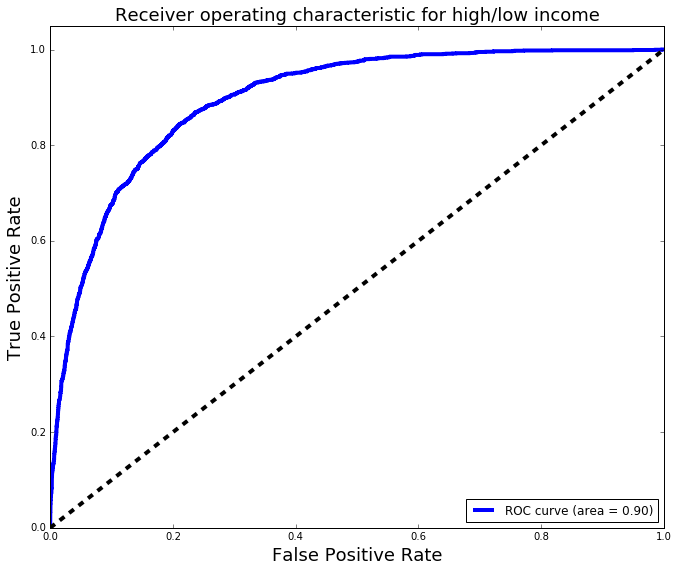

In [67]:
""" Check your performance so far."""

conmat = np.array(confusion_matrix(Y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['over_50k', 'under_50k'],
                            columns=['predicted_over50k','predicted_under50k'])

print(confusion)
print classification_report(Y_test,y_pred)
roc_auc_score(Y_test, y_score)

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for high/low income', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [82]:
C_vals = [1.0, 1.25, 1.50, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0]
penalties = ['l1','l2']

gs = GridSearchCV(lr, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=15)
gs.fit(X, y)

GridSearchCV(cv=15, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [84]:
gs.best_params_

{'C': 3.25, 'penalty': 'l2'}

In [85]:
logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, Y_train)

In [86]:
cv_pred = cv_model.predict(X_test)

In [87]:
cm3 = confusion_matrix(Y_test, cv_pred, labels=logreg.classes_)
cm3 = pd.DataFrame(cm3, columns=logreg.classes_, index=logreg.classes_)
cm3

,0,1
0,5658,461
1,782,1158


In [88]:
print classification_report(Y_test, cv_pred, labels=logreg.classes_)

             precision    recall  f1-score   support

          0       0.88      0.92      0.90      6119
          1       0.72      0.60      0.65      1940

avg / total       0.84      0.85      0.84      8059



In [89]:
df2.head()

,Unnamed: 0,age,type_employer,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country
0,18099,45,Federal-gov,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,20,United-States
1,10672,17,Private,12th,8,Never-married,Sales,Own-child,White,Male,0,0,40,United-States
2,17947,24,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States
3,13753,46,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,4064,0,40,United-States
4,4279,59,Private,Bachelors,13,Separated,Adm-clerical,Unmarried,White,Male,0,0,60,United-States


In [151]:
df2 = df2.replace('?', np.nan)

In [169]:
df2['income']= [2 for x in df2['country']]

In [170]:
full= pd.concat([df2, df])
full

,Unnamed: 0,age,type_employer,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,18099,45,Federal-gov,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,20,United-States,2
1,10672,17,Private,12th,8,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,2
2,17947,24,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,2
3,13753,46,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,4064,0,40,United-States,2
4,4279,59,Private,Bachelors,13,Separated,Adm-clerical,Unmarried,White,Male,0,0,60,United-States,2
5,13849,54,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,2
6,8275,56,Private,HS-grad,9,Divorced,Other-service,Unmarried,Black,Female,0,0,40,Jamaica,2
7,29198,27,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1651,40,United-States,2
8,4618,32,Federal-gov,Assoc-voc,11,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,Male,0,0,40,United-States,2
9,26996,33,Private,1st-4th,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,0,2603,32,Mexico,2


In [171]:
X2 = patsy.dmatrix('~ C(type_employer) + C(education_num) + C(marital)+ C(occupation) + C(race)+ C(sex) + C(country) +C(age) +C(hr_per_week)', full)


In [172]:
cv_pred = cv_model.predict(X2)

In [173]:
cv_pred= cv_model.decision_function(X2)

In [174]:
full['pred']=cv_pred

In [175]:
full.head()

,Unnamed: 0,age,type_employer,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income,pred
0,18099,45,Federal-gov,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,20,United-States,2,-0.384708
1,10672,17,Private,12th,8,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,2,-3.578755
2,17947,24,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,2,-3.575834
3,13753,46,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,4064,0,40,United-States,2,-0.252177
4,4279,59,Private,Bachelors,13,Separated,Adm-clerical,Unmarried,White,Male,0,0,60,United-States,2,-0.768715


In [176]:
final=full.loc[full['income']==2,:]

In [177]:
del final['income']

In [178]:
del final['Unnamed: 0']

In [179]:
final.to_csv('/Users/samanthafalk/class-GA/week-five/1.3-classification-challenge/final.csv')

In [181]:
len(final['country'])

8141